In this notebook, I am going to explore all the data columns and there relationship between the other data columns.

Also making the note of the observations in details.

In [69]:
# Loading all the required packages for EDA.
import pandas as pd  # Loading and working with data frame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Now my next step is to load the dataset as there are two different datasets, so i will be creating two different datasets names:

1. df_training for training dataset
2. df_testing for testing dataset

In [70]:
# Loading the datasets

# Training dataset
df_training = pd.read_csv('G:\\Project\\Coding_challange\\Titanic_Survivor_01\\dataset\\train.csv')
df_training

# Testing dataset
df_testing = pd.read_csv('G:\\Project\\Coding_challange\\Titanic_Survivor_01\\dataset\\test.csv')
df_testing

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Once we have read the dataset now let's check the length of the DataFrame.

In [71]:
print(len(df_training))
print(len(df_testing))

891
418


Once we have check the length the we can also see the shape of the DataFrame.

In [72]:
print(f"The shape of the training dataset is {df_training.shape}")
print(f"The shape of the testing dataset is {df_testing.shape}")

The shape of the training dataset is (891, 12)
The shape of the testing dataset is (418, 11)


From the above observations we can say that one column in the testing dataset is missing and the missing column will be my traget column in the training data as shown below:

In [73]:
print(df_training.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [74]:
print(df_testing.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


From the above we can see that the column name "Survived" is present in the training dataset but not present in the testing dataset as "Survived" is my target column.

If I have my target column present then it's consider to be a supervised learning.

Def: In Supervised learning the data i.e. present contains input as well as output labels. For example df_training dataframe.

Def: In Unsupervied learning the data i.e. present doesn't contain any output data. For example df_testing dataframe.

Initially I will be working with df_training -->  

In [75]:
df_training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Check the missing value in the dataframe

In [76]:
# Function for checking the missing value
def check_null_value(data):
    return data.isnull().sum()

In [77]:
check_null_value(df_training)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From my above observation we can see that three columns have missing values. Let's first deal with missing values

In [78]:
# precentage of missing values

age_missing_percentage  = check_null_value(df_training.Age)/891 * 100
print(f"The missing precentage of Age data is {age_missing_percentage .round()}")

cabin_missing_percentage  = check_null_value(df_training.Cabin)/len(df_training) * 100
print(f"The missing precentage of Cabin data is {cabin_missing_percentage .round()}")

enbarked_missing_percentage = check_null_value(df_training.Embarked)/len(df_training) * 100
print(f"The missing precentage of Embarked data is {enbarked_missing_percentage}")



The missing precentage of Age data is 20.0
The missing precentage of Cabin data is 77.0
The missing precentage of Embarked data is 0.22446689113355783


From the above obervation we can see that Cabin data have more than 50% of missing value so we can delete the column, but let's move more deeper and check the relationship between every element.

In [79]:
# checking the information of the data.
def information(data):
    return data.info()

In [80]:
print(f"The information of the data frame is {information(df_training)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
The information of the data frame is None


From the above information I can see that my data frame consists of different dtype of elements so let's deal will all those things befor checking the describe function.

From my obeservation i can see that the following columns can be deleted as shown below:

In [81]:
df_training.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [82]:
df_training

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


After deleting the column Our next step is to deal with categorical variable.

In [83]:
df_training['Sex'].unique()

array(['male', 'female'], dtype=object)

From the above observation we can see that there are two different categorical variable. Now let's create dummy for it.

In [84]:
df_training['Sex'] = pd.get_dummies(df_training['Sex'], drop_first=True) 

From the above code my observation is 1 --> Male and 0 --> female

# Histogram

#### Def: A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

# Creating a Histogram

To create a histogram the first step is to create bin of the ranges, then distribute the whole range of the values into a series of intervals, and count the values which fall into each of the intervals.Bins are clearly identified as consecutive, non-overlapping intervals of variables.

Link for the resource of my study is https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/

In [85]:
df_training.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='Count'>

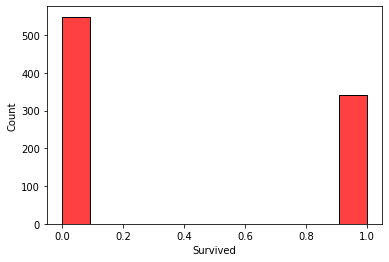

In [86]:
sns.histplot(df_training['Survived'], color=['Red'])

From my above observtion we can see that 1 represent Survived and 0 represent not survived.

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

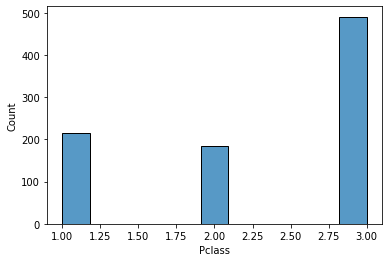

In [87]:
sns.histplot(df_training['Pclass'])

From the above observation we can see that it has 3 different classes 

1 ---> Class 1

2 ---> Class 2

3 ---> Class 3

<AxesSubplot:xlabel='Sex', ylabel='Count'>

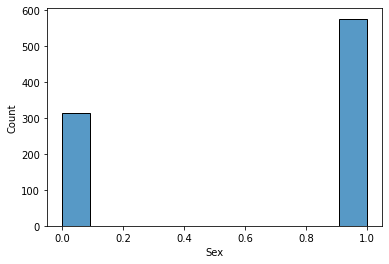

In [88]:
sns.histplot(df_training['Sex'])

From the above observation is 1 --> Male and 0 --> female

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

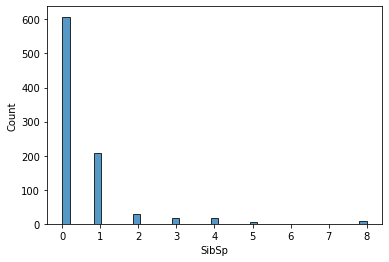

In [89]:
sns.histplot(df_training['SibSp'])

From the above observation we can see that this column represent the siblings/spouses who have boarded the ship

<AxesSubplot:xlabel='Parch', ylabel='Count'>

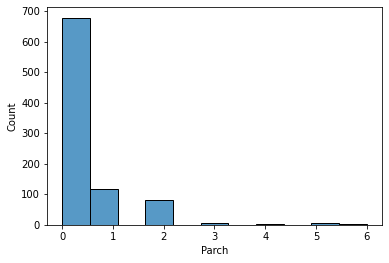

In [90]:
sns.histplot(df_training['Parch'])

This column represent the parents

As my cabin have more number of missing value we can even drop this 

In [91]:
df_training.drop(columns=['Cabin'], inplace=True, axis=1)

In [92]:
df_training

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


From the above observation we can see that Embarked column have text categorical variable let's deal with it.

In [93]:

df_training['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Applying map function to Embarked column

In [94]:
df_training['Embarked'] = df_training['Embarked'].map({'S':0, 'C': 1, 'Q': 2})

In [95]:
df_training

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0
887,1,1,0,19.0,0,0,30.0000,0.0
888,0,3,0,NaN,1,2,23.4500,0.0
889,1,1,1,26.0,0,0,30.0000,1.0


<AxesSubplot:xlabel='Embarked', ylabel='Count'>

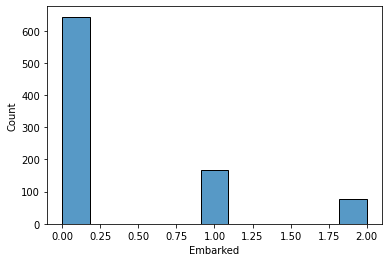

In [96]:
sns.histplot(df_training['Embarked'])

From the above obervation we can see that 

1. 0 --> Cherbourg
2. 1 --> Queenstown
3. 2 --> Southampton

Not is time to deal with all the missing values

In [97]:
check_null_value(df_training['Embarked'])

2

In [98]:
df_training['Embarked'].unique()

array([ 0.,  1.,  2., nan])

In [99]:
df_training['Age'] = df_training['Age'].fillna(df_training['Age'].median())

In [100]:
df_training['Embarked'] = df_training['Embarked'].fillna(df_training['Embarked'].mean().round(2))

In [101]:
df_training

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0
887,1,1,0,19.0,0,0,30.0000,0.0
888,0,3,0,28.0,1,2,23.4500,0.0
889,1,1,1,26.0,0,0,30.0000,1.0


In [102]:
# Final check 
check_null_value(df_training)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Once we have no missing value we can now check the relationship between the columns

In [103]:
df_training

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0
887,1,1,0,19.0,0,0,30.0000,0.0
888,0,3,0,28.0,1,2,23.4500,0.0
889,1,1,1,26.0,0,0,30.0000,1.0


# Bar plot

C:\Users\mksmu\anaconda3\envs\hello\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

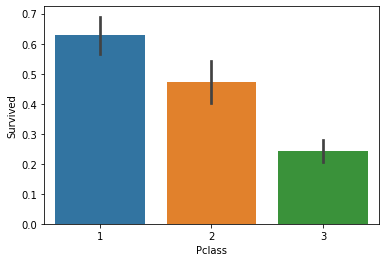

In [104]:
sns.barplot(df_training['Pclass'], df_training['Survived'])

From the above obervation we can see that class --> 1 have more survived as compare to other classes. 

C:\Users\mksmu\anaconda3\envs\hello\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

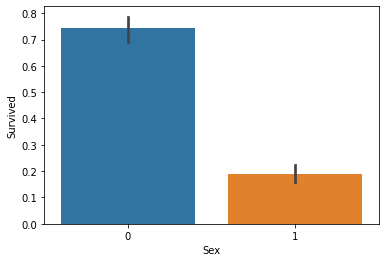

In [105]:
sns.barplot(df_training['Sex'], df_training['Survived'])

From the above observation we can see that Female have survived more as compare to male.

<AxesSubplot:xlabel='Age', ylabel='Count'>

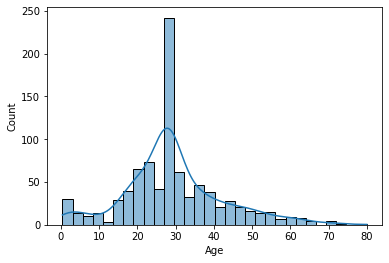

In [106]:
sns.histplot(df_training['Age'], kde=True)

The preson between the range of 20 to 40 have survived

C:\Users\mksmu\anaconda3\envs\hello\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

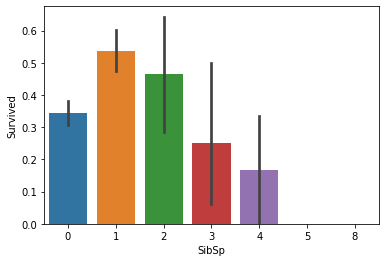

In [107]:
sns.barplot(df_training['SibSp'], df_training['Survived'])

The person who have even a single relationship they tried to survived there patnar.

C:\Users\mksmu\anaconda3\envs\hello\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

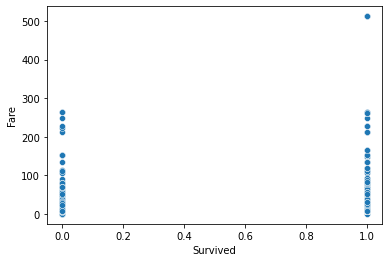

In [108]:
sns.scatterplot(df_training['Survived'],df_training['Fare'] )

Based on all the above obervation we have clear idea about the data and its relationship.

let's check the correlation between all the data.

<AxesSubplot:>

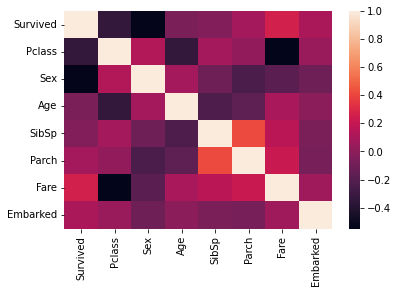

In [109]:
sns.heatmap(df_training.corr())

The altermative way of dealing with correlation matrix is VIF

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_features = df_training.columns
# Vif calculation
vif_data['VIF'] = [variance_inflation_factor(df_training.values, i) for i in range(len(df_training.columns))]

# print
print(vif_data)

        VIF
0  1.944892
1  5.471117
2  3.624807
3  4.482789
4  1.571030
5  1.621643
6  1.923016
7  1.399080


One of the saying is that if my VIF value is more than 5 then we can ignore that column here Pclass = 5.47 as less we can ignore it.

# Now let's work with test data aswell:

In [111]:
df_testing

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [112]:
check_null_value(df_testing)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [113]:
# drop unrequired column in the dataset
df_testing.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [114]:
df_testing

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


Transforming into numerical

In [115]:
df_testing['Sex'] = pd.get_dummies(df_testing['Sex'], drop_first=True)


In [116]:
check_null_value(df_testing)

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [117]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Embarked_transform = encoder.fit_transform(df_testing.Embarked)

In [118]:
df = pd.DataFrame(Embarked_transform )

In [119]:
df

,0
0,1
1,2
2,1
3,2
4,2
...,...
413,2
414,0
415,2
416,2


In [120]:
df.columns = ['Embarked_transform']

In [121]:
df

,Embarked_transform
0,1
1,2
2,1
3,2
4,2
...,...
413,2
414,0
415,2
416,2


In [122]:
df_testing = pd.concat([df_testing, df], axis=1)

In [123]:
df_testing.drop(['Embarked'], axis = 1, inplace = True)

In [125]:
# handling all the missing values
check_null_value(df_testing)

Pclass                 0
Sex                    0
Age                   86
SibSp                  0
Parch                  0
Fare                   1
Embarked_transform     0
dtype: int64

In [126]:
df_testing['Age'] = df_testing['Age'].fillna(df_testing['Age'].median())


In [127]:
df_testing['Fare'] = df_testing['Fare'].fillna(df_testing['Fare'].median())

In [128]:
check_null_value(df_testing)

Pclass                0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Embarked_transform    0
dtype: int64

once we have done all the preprocessing and featur engg. steps lets dunp the clean data

In [129]:
df_training.to_csv('training.csv')

In [130]:
df_testing.to_csv('testing.csv')

In [133]:
training = pd.read_csv('G:\\Project\\Coding_challange\\Titanic_Survivor_01\\Notebook\\training.csv')


In [134]:
training

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,1,0,38.0,1,0,71.2833,1.0
2,2,1,3,0,26.0,0,0,7.9250,0.0
3,3,1,1,0,35.0,1,0,53.1000,0.0
4,4,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,886,0,2,1,27.0,0,0,13.0000,0.0
887,887,1,1,0,19.0,0,0,30.0000,0.0
888,888,0,3,0,28.0,1,2,23.4500,0.0
889,889,1,1,1,26.0,0,0,30.0000,1.0


In [135]:
training = pd.read_csv('G:\\Project\\Coding_challange\\Titanic_Survivor_01\\Notebook\\testing.csv')
